#### <div style= "font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;" > Table of Contents<br><div>  
- **[Task description](#1)**
- **[Imports](#2)**
- **[Dataset overview](#3)**
- **[Dataset analysis (EDA)](#4)**
- **[Preprocessing, data transformation, features engineering](#5)**
- **[Model training](#6)**
- **[Submission and conclusion](#7)**

<a id="1"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Task description </div>

The first challenge of the Playground series in 2024 is offering a binary classification problem for predicting bank customer churn. Submissions are evaluated by ROC-AUC metric.

My goal is to try to find any insights in the data and build a solid model which might be 1-2% below the best score.

<a id="2"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> IMPORTS </div>

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [15]:
data=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sample_submission=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
train = data.copy()

<a id="3"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Dataset overview </div>

In [16]:
print('Train shape:', train.shape)
print('Test shape: ', test.shape)

Train shape: (165034, 14)
Test shape:  (110023, 13)


In [17]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [18]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [22]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,110023.0,2.200450e+05,31761.048671,165034.00,1.925395e+05,220045.00,2.475505e+05,275056.00
CustomerId,110023.0,1.569210e+07,71684.990992,15565701.00,1.563286e+07,15690175.00,1.575693e+07,15815690.00
CreditScore,110023.0,6.565308e+02,80.315415,350.00,5.970000e+02,660.00,7.100000e+02,850.00
Age,110023.0,3.812221e+01,8.861550,18.00,3.200000e+01,37.00,4.200000e+01,92.00
Tenure,110023.0,4.996637e+00,2.806148,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,110023.0,5.533361e+04,62788.519675,0.00,0.000000e+00,0.00,1.201456e+05,250898.09
NumOfProducts,110023.0,1.553321e+00,0.544714,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,110023.0,7.530425e-01,0.431244,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,110023.0,4.952328e-01,0.499980,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,110023.0,1.123151e+05,50277.048244,11.58,7.444033e+04,117832.23,1.546314e+05,199992.48


In [23]:
print('Train NONE elements:', train.isnull().sum().sum())
print('Test NONE elements:', test.isnull().sum().sum())

Train NONE elements: 0
Test NONE elements: 0


A large dataset without None values, most features are already numeric.

<a id="4"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Dataset analysis (EDA) </div>

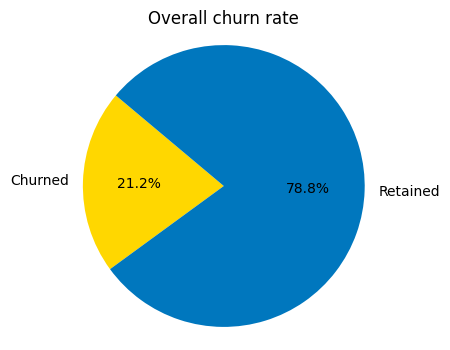

In [24]:
# Churn rate
churned_cnt = data['Exited'].sum()
retained_cnt = len(data) - churned_cnt
plt.figure(figsize=(4, 4))
plt.pie([churned_cnt, retained_cnt], labels=['Churned', 'Retained'], colors=['#FFD700', '#0077BE'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Overall churn rate')
plt.show()

The overall churn rate from the train dataset is about 21%.

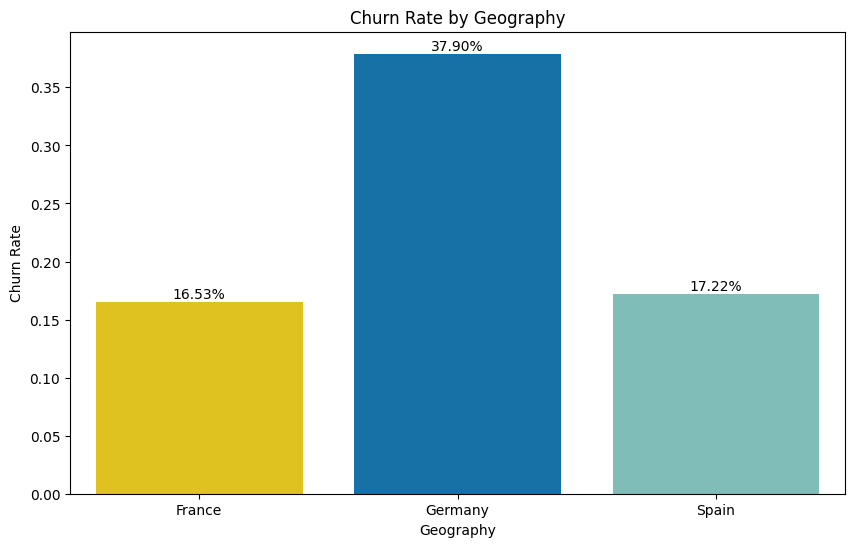

In [25]:
# Churn rate by country
country_churn = data.groupby('Geography')['Exited'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_churn.index, y=country_churn.values, palette=['#FFD700', '#0077BE', '#76c7c0'])
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
for index, value in enumerate(country_churn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

While churn rate in France and Spain is almost the same, Germany is the leader with almost 38%.

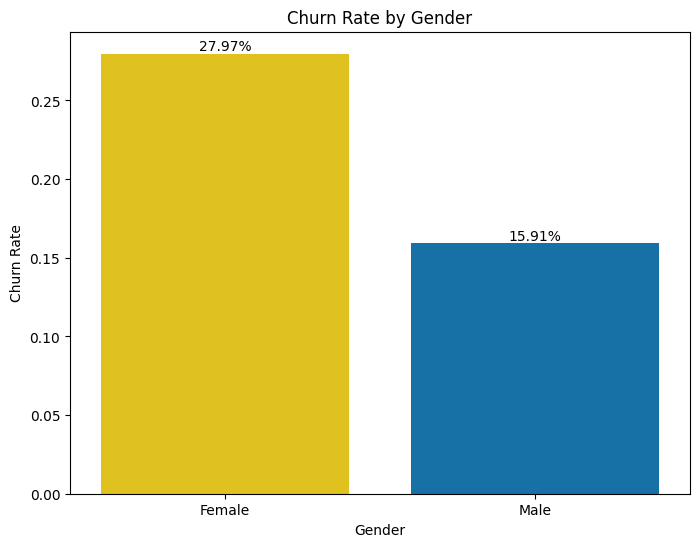

In [26]:
# Churn rate by gender
gender_churn = data.groupby('Gender')['Exited'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_churn.index, y=gender_churn.values, palette=['#FFD700', '#0077BE'])
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
for index, value in enumerate(gender_churn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Female customers have a higher churn rate.

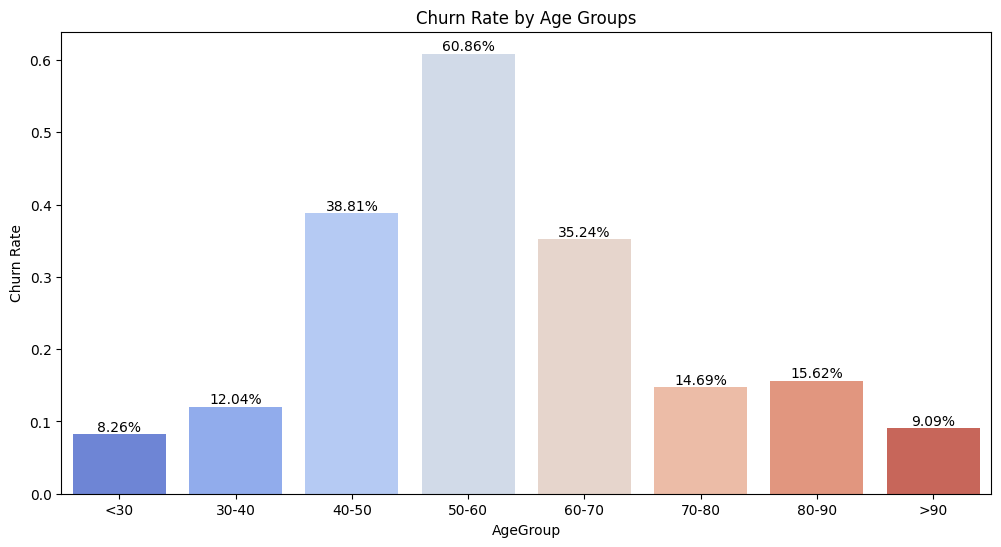

In [27]:
# Churn by Age groups
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
age_group_churn = train.groupby('AgeGroup')['Exited'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_churn.index, y=age_group_churn.values, palette=sns.color_palette("coolwarm", len(age_group_churn)))
plt.title('Churn Rate by Age Groups')
plt.ylabel('Churn Rate')
for index, value in enumerate(age_group_churn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Churn rates by age seems like a normal distribution with the peak at 50-60 group. 

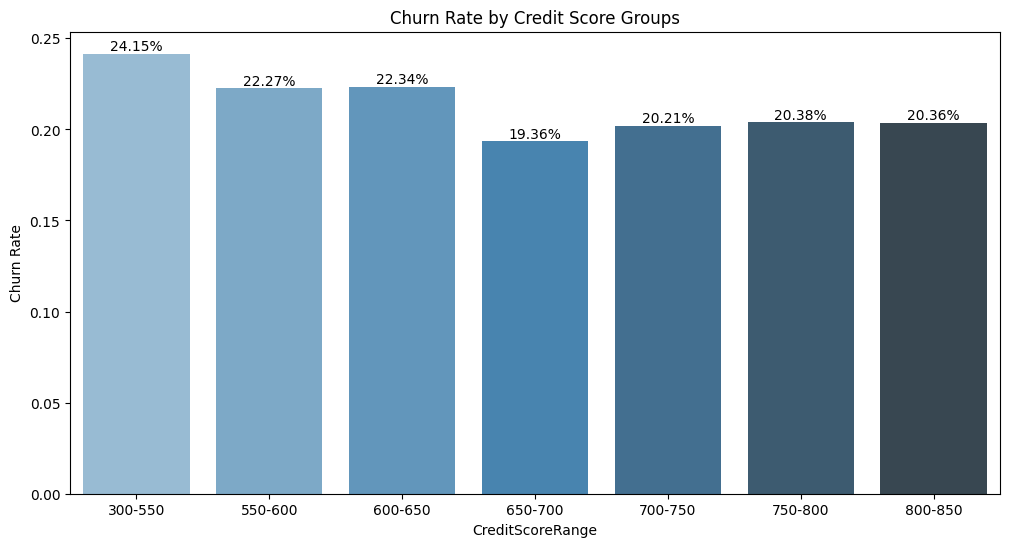

In [28]:
# Credit score analysis
train['CreditScoreRange'] = pd.cut(train['CreditScore'], bins=[300, 550, 600, 650, 700, 750, 800, 850], 
                                  labels=['300-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850'])
cc_churn = train.groupby('CreditScoreRange')['Exited'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=cc_churn.index, y=cc_churn.values, palette="Blues_d")
plt.title('Churn Rate by Credit Score Groups')
plt.ylabel('Churn Rate')
for index, value in enumerate(cc_churn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Almost no changes between Credit Score groups.

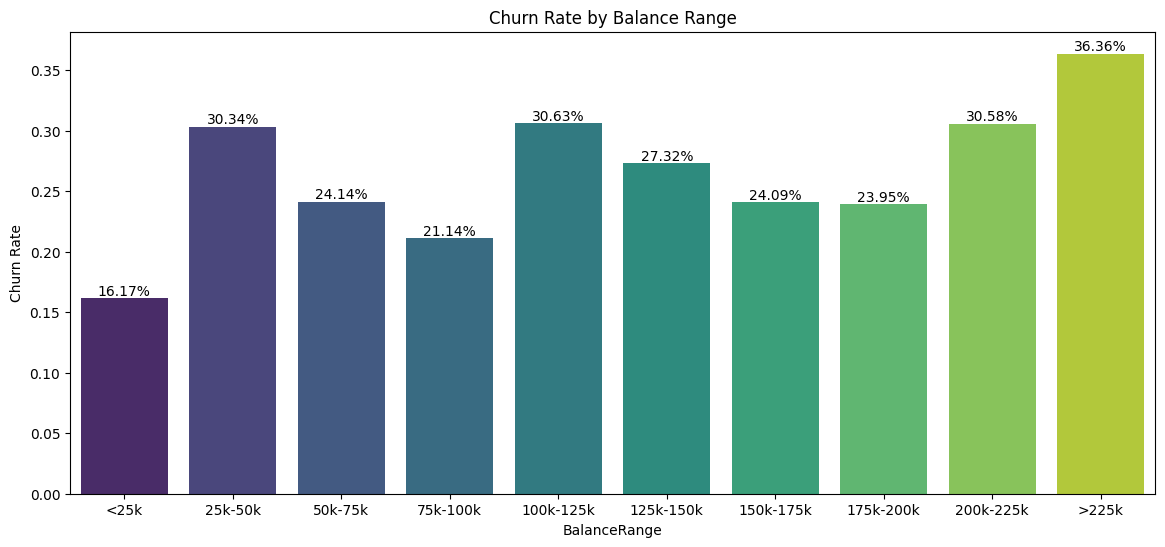

In [29]:
# Balance analysis
train['BalanceRange'] = pd.cut(train['Balance'], bins=[-1, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, float('inf')],
                              labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k-225k', '>225k'])
b_churn = train.groupby('BalanceRange')['Exited'].mean()
plt.figure(figsize=(14, 6))
sns.barplot(x=b_churn.index, y=b_churn.values, palette="viridis")
plt.title('Churn Rate by Balance Range')
plt.ylabel('Churn Rate')
for index, value in enumerate(b_churn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Customers with high balances have a big churn rate.

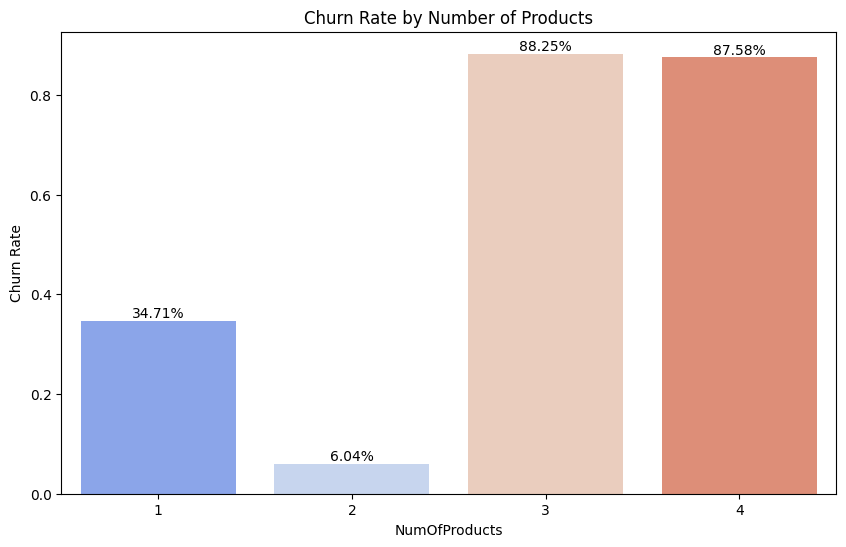

In [30]:
# Churn by number of products
churn_pn = train.groupby('NumOfProducts')['Exited'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_pn.index, y=churn_pn.values, palette="coolwarm")
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
for index, value in enumerate(churn_pn.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Customers using 2 product has the smallest churn rate, just 6%. Customers with only one might be considered as an average, 34%, which is much less than 3-4 products users with more than 87%. 

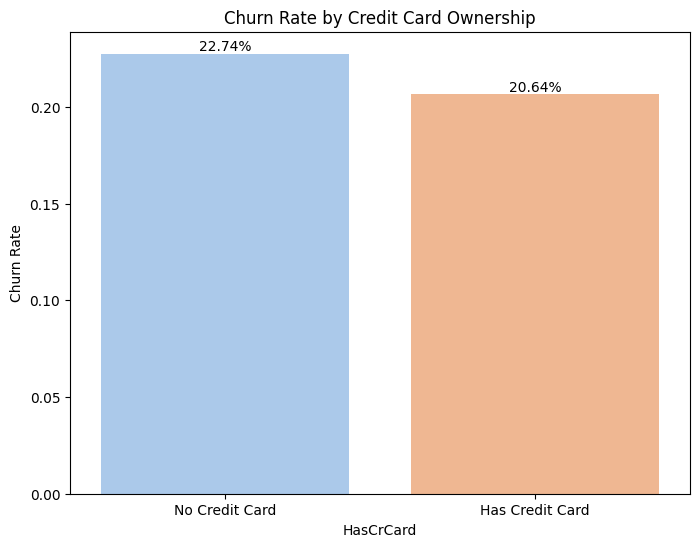

In [31]:
# Churn rate by credit card ownership
cco = train.groupby('HasCrCard')['Exited'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=cco.index.map({0: 'No Credit Card', 1: 'Has Credit Card'}), y=cco.values, palette="pastel")
plt.title('Churn Rate by Credit Card Ownership')
plt.ylabel('Churn Rate')
for index, value in enumerate(cco.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Just a slight difference between Credit card holders and non-holders.

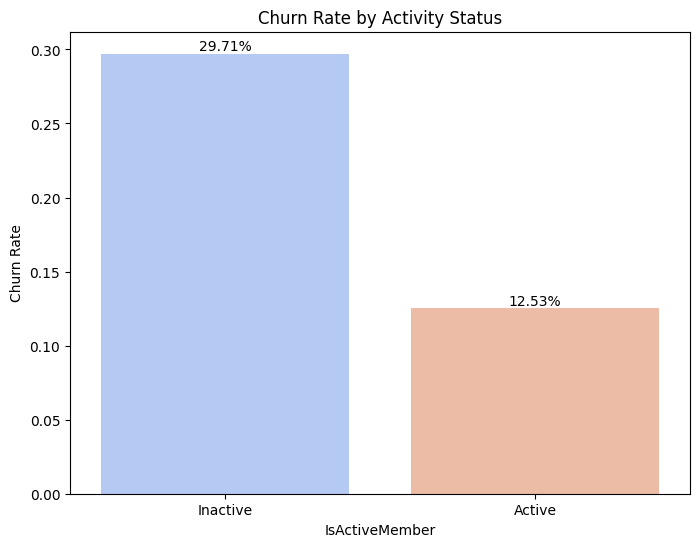

In [32]:
# Churn by activity status
as_c = train.groupby('IsActiveMember')['Exited'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=as_c.index.map({0: 'Inactive', 1: 'Active'}), y=as_c.values, palette="coolwarm")
plt.title('Churn Rate by Activity Status')
plt.ylabel('Churn Rate')
for index, value in enumerate(as_c.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

Inactive members have a significantly higher churn rate, compared to active members.

**Conclusion:**
 Country, gender, age, number of products and activity status are significant factors related to churn.

<a id="5"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Preprocessing, data transformation, features engineering </div>

I planned to drop Surname column as well, but let's inspect how many unique values are there:

In [33]:
sur_train = data['Surname'].value_counts()
print(sur_train)
sur_test = test['Surname'].value_counts()
print(sur_test)

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64
Surname
Hsia         1606
T'ien        1484
Hs?          1124
Maclean      1042
Ts'ui        1017
             ... 
Wallwork        1
Praed           1
Kentish         1
Younger         1
Distefano       1
Name: count, Length: 2708, dtype: int64


Seems it might have some insights, let's keep it.

In [34]:
# Feature engineering

# Customer Engagement Score - assuming IsActiveMember and NumOfProducts are indicators of engagement
data['EngagementScore'] = data['IsActiveMember'] * (data['NumOfProducts'] / data['NumOfProducts'].max())

# Wealth Segment by Balance
bins = [-1, 50000, 150000, float('inf')]
labels = ['Low', 'Medium', 'High']
data['WealthSegment'] = pd.cut(data['Balance'], bins=bins, labels=labels).astype(object)

# Product Concentration Index - inverse relationship with the number of products
data['ProductConcentration'] = 1 / (data['NumOfProducts'] + 0.01)

# Age Groups 
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False).astype(object)

# Same for the Test dataset

# Customer Engagement Score
test['EngagementScore'] = test['IsActiveMember'] * (test['NumOfProducts'] / test['NumOfProducts'].max())

# Wealth Segment by Balance
test['WealthSegment'] = pd.cut(test['Balance'], bins=bins, labels=labels).astype(object)

# Product Concentration Index 
test['ProductConcentration'] = 1 / (test['NumOfProducts'] + 0.01)

# Age Groups 
test['AgeGroup'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, right=False).astype(object)


In [35]:
y = data.Exited
X = data.drop(['id', 'CustomerId', 'Exited'], axis=1)

testY = test.id
test = test.drop(['id', 'CustomerId'], axis=1)

categorical_features = np.where(X.dtypes == 'object')[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="6"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Model training</div>

I'm using CatBoost Classifier as from the past challanges I know this model perfomance is very high and it can handle categorical features as is. 

In [36]:
cat = CatBoostClassifier(iterations=3500,
                         depth=5,
                         learning_rate=0.01,
                         early_stopping_rounds=1000,
                         loss_function='MultiClass',
                         eval_metric='AUC',
                         random_seed=122,
                         l2_leaf_reg=1,
                         max_ctr_complexity=15,
                         grow_policy='Lossguide',
                         max_leaves=128,
                         min_data_in_leaf=5,
                         verbose=500,
                         cat_features=categorical_features)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc_val = roc_auc_score(y_test, y_pred)

print("Model Accuracy:",accuracy)
print("AUC:",auc_val)

0:	total: 194ms	remaining: 11m 17s
500:	total: 55.6s	remaining: 5m 32s
1000:	total: 1m 49s	remaining: 4m 33s
1500:	total: 2m 42s	remaining: 3m 36s
2000:	total: 3m 39s	remaining: 2m 44s
2500:	total: 4m 32s	remaining: 1m 48s
3000:	total: 5m 26s	remaining: 54.2s
3499:	total: 6m 19s	remaining: 0us
Model Accuracy: 0.8685342651128032
AUC: 0.7579511706368511


<a id="7"></a>
# <div style="font-family: Verdana; font-weight: bold; letter-spacing: 1px; color: #003300; font-size: 110%; text-align: center; padding: 10px; background: #e6ffe6; border-radius: 5px;"> Submission and conclusion</div>

In [37]:
submission = pd.DataFrame({
    "id": testY,
    "Exited": cat.predict_proba(test)[:,1]})
submission.to_csv("s4e01_0130_1.csv", index=False)

Submission public score: 0.88951

**Conclusion:** even the training metrics weren't so hight, I'm satisfied with the public score, which is in 1.5% from the current leader (0.90182), while the model is easy and fast.